<a href="https://colab.research.google.com/github/atosiroy/Human-Activity-Recognition/blob/main/Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones

The HAR dataset was created from the recordings of 30 participants performing activities of daily life ( walking, walking upstairs, walking downstairs, sitting, standing, laying ) while carrying a waist-mounted smartphone embedded inertial sensors - accelerometer and gyroscope.

**The objective is to classify activites into one of the six activities performed. **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
folder = 'drive/MyDrive/HAR/'

Mounted at /content/drive


In [ ]:
folder = 'HAR/'

Importing all the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the datasets

In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/ML_labs/projects/HAR/train.csv")
data_test = pd.read_csv("/content/drive/MyDrive/ML_labs/projects/HAR/test.csv")

In [ ]:
data_train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
data_train.shape

(7352, 563)

In [ ]:
data_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [ ]:
data_test.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


Checking for missing values in dataset

In [ ]:
missing_col = data_train.columns[data_train.isna().any()]
missing_col

Index([], dtype='object')

Checking for data imbalance

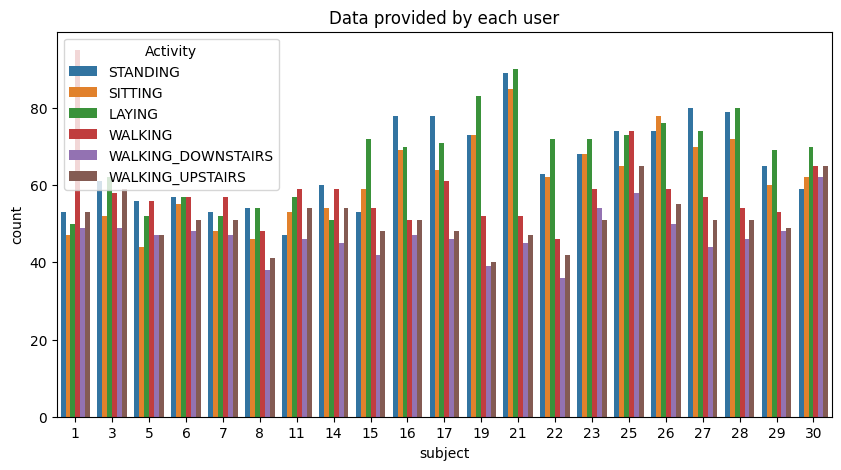

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Data provided by each user', fontsize = 12)
sns.countplot(x = 'subject', hue = 'Activity', data = data_train)
plt.show()

Class Distribution

In [ ]:
data_train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

<Axes: xlabel='Activity'>

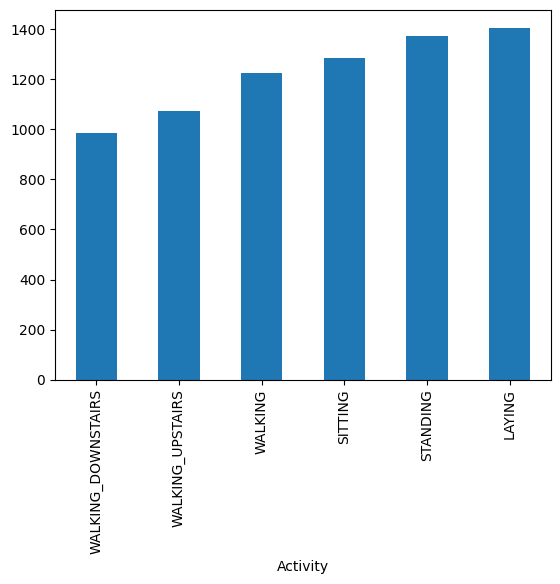

In [ ]:
data_train['Activity'].value_counts().sort_values().plot(kind = 'bar')

In [ ]:
pd.crosstab(index = data_train['Activity'], columns = 'count')

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


In [ ]:
X = pd.DataFrame(data_train.drop(['subject', 'Activity'], axis = 1))
Y = data_train['Activity']
Xtest = pd.DataFrame(data_test.drop(['subject', 'Activity'], axis = 1))
Ytest = data_test['Activity']

Xtest.shape, Ytest.shape

((2947, 561), (2947,))

In [ ]:
X.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


Converting the target label into numerical form using one hot encoding



In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
Y = encoder.fit_transform(Y)
Ytest = encoder.transform(Ytest)
Y.shape

(7352,)

In [ ]:
Y

array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
print("Classes in the label encoder:", encoder.classes_)

Classes in the label encoder: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
Xtest = scaler.transform(Xtest)

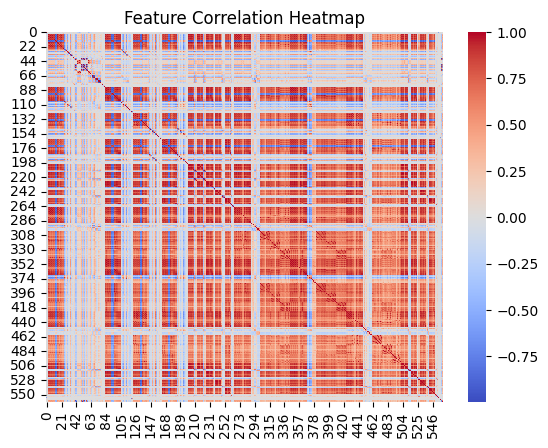

In [ ]:
corr_matrix = pd.DataFrame(X).corr() # Calculate correlation matrix of X
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

## Classical ML Models for Classification

Support Vector Machine


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
from sklearn import metrics
grid = {'C':      np.logspace(-4,3,10),
        'kernel': ['linear']}
M = GridSearchCV(estimator  = SVC(),
                 param_grid = grid,
                 cv         = 5,
                 scoring    = 'accuracy')
M.fit(X, Y)
Yp = M.predict(Xtest)
cm = confusion_matrix(Ytest, Yp)

print(cm)

accuracy = metrics.accuracy_score(Ytest, Yp)
print('% of Accuracy: ' + str(100*np.mean(accuracy)))

[[537   0   0   0   0   0]
 [  1 438  51   0   0   1]
 [  0  19 513   0   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   6 399  15]
 [  0   0   0  16   2 453]]
% of Accuracy: 96.19952494061758


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
from sklearn import metrics
grid = {'C':      np.logspace(-4,3,10),
        'kernel': ['linear']}
M = GridSearchCV(estimator  = SVC(decision_function_shape='ovo'),
                 param_grid = grid,
                 cv         = 5,
                 scoring    = 'accuracy')
M.fit(X, Y)
Yp = M.predict(Xtest)
cm = confusion_matrix(Ytest, Yp)
# print('%Err: ' + str(100*np.mean(Ytest != Yp)))
print(cm)

accuracy = metrics.accuracy_score(Ytest, Yp)
print('% of Accuracy: ' + str(100*np.mean(accuracy)))

[[537   0   0   0   0   0]
 [  1 438  51   0   0   1]
 [  0  19 513   0   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   6 399  15]
 [  0   0   0  16   2 453]]
% of Accuracy: 96.19952494061758


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
from sklearn import metrics
grid = {'C':      np.logspace(-2,3,5),
        'kernel': ['rbf'],
        'gamma':  [0.01, 0.1, 1, 10, 100]}
M = GridSearchCV(estimator  = SVC(decision_function_shape='ovo'),
                 param_grid = grid,
                 cv         = 5,
                 scoring    = 'accuracy')
M.fit(X, Y)
Yp = M.predict(Xtest)
cm = confusion_matrix(Ytest, Yp)
print(cm)
accuracy = metrics.accuracy_score(Ytest, Yp)
print('% of Accuracy: ' + str(100*np.mean(accuracy)))
#print('%Err: ' + str(100*np.mean(Ytest != Yp)))


[[506   0   0   0  31   0]
 [  1 434  35   0  21   0]
 [  0  22 492   0  18   0]
 [  0   0   0 412  84   0]
 [  0   0   0   9 382  29]
 [  0   0   0  10  50 411]]
% of Accuracy: 89.48082796063794


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
grid = {'max_depth': [1,2,4,8,16]}
M = GridSearchCV(estimator  = DecisionTreeClassifier(),
                 param_grid = grid,
                 cv         = 10,
                 scoring    = 'accuracy')
M.fit(np.asarray(X),np.asarray(Y))
Yp = M.predict(Xtest)
cm = confusion_matrix(Ytest, Yp)
#print('%Err: ' + str(100*np.mean(Ytest != Yp)))
print(cm)

accuracy = metrics.accuracy_score(Ytest, Yp)
print('% of Accuracy: ' + str(100*np.mean(accuracy)))

[[537   0   0   0   0   0]
 [  0 371 120   0   0   0]
 [  0  55 477   0   0   0]
 [  0   0   0 470  17   9]
 [  0   0   0  14 348  58]
 [  0   0   0  73  28 370]]
% of Accuracy: 87.30912792670512


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
M = RandomForestClassifier(n_estimators=400)
M.fit(X,Y)
Yp = M.predict(Xtest)
cm = confusion_matrix(Ytest, Yp)
#print('%Err: ' + str(100*np.mean(Ytest != Yp)))
print(cm)

accuracy = metrics.accuracy_score(Ytest, Yp)
print('% of Accuracy: ' + str(100*np.mean(accuracy)))

[[537   0   0   0   0   0]
 [  0 438  53   0   0   0]
 [  0  36 496   0   0   0]
 [  0   0   0 480   8   8]
 [  0   0   0  19 355  46]
 [  0   0   0  35   6 430]]
% of Accuracy: 92.84017645062775


K-Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors': [1,2,4,8,16,32]}
M = GridSearchCV(estimator  = KNeighborsClassifier(),
                 param_grid = grid,
                 cv         = 10,
                 scoring    = 'accuracy')
M.fit(X, Y)
Yp = M.predict(Xtest)
cm = confusion_matrix(Ytest, Yp)
#print('%Err: ' + str(100*np.mean(Ytest != Yp)))
print(cm)

accuracy = metrics.accuracy_score(Ytest, Yp)
print('% of Accuracy: ' + str(100*np.mean(accuracy)))

[[513  10  14   0   0   0]
 [  3 393  94   0   0   1]
 [  0  27 505   0   0   0]
 [  0   0   0 491   4   1]
 [  0   0   0  63 306  51]
 [  0   0   0  47   2 422]]
% of Accuracy: 89.24329826942655


In [ ]:
# Create the parameter grid based on the results of random search
# params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     #'C'},
                    #{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
# Performing CV to tune parameters for best SVM fit
# svm_model = GridSearchCV(SVC(), params_grid, cv=5)
# svm_model.fit(X, Y)